In [41]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot


In [42]:
df =pd.read_csv('BID_Stock_Data (1).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-27,13193.956055,13264.512695,12770.621094,12982.289063,12982.289063,4593392.0
1,2014-01-28,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-29,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-30,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2555,2023-12-08,40600.000000,42000.000000,40600.000000,41900.000000,41900.000000,2406400.0
2556,2023-12-11,42000.000000,42200.000000,41350.000000,41400.000000,41400.000000,1589400.0
2557,2023-12-12,41500.000000,42050.000000,41200.000000,41900.000000,41900.000000,956200.0
2558,2023-12-13,41900.000000,42000.000000,40600.000000,41600.000000,41600.000000,793400.0


In [43]:
data = df['Close'][::-1];
val= data.reset_index(drop=True);
val

0       41600.000000
1       41600.000000
2       41900.000000
3       41400.000000
4       41900.000000
            ...     
2555             NaN
2556             NaN
2557             NaN
2558             NaN
2559    12982.289063
Name: Close, Length: 2560, dtype: float64

In [44]:
# Create a date range starting from a specific date
start_date = '1/27/2014'
stop_date = '12/14/2023'
dates = pd.date_range(start=start_date, periods=len(val),freq='D')

In [45]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [53]:
# 2.  chia train test theo tỉ lệ 8:2
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing
train_size = int(0.8 * len(df))
test_size = int(0.2* len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [54]:
!pip install pmdarima

In [55]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=30091.815, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30094.950, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30096.632, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30096.648, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30093.581, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=30098.414, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=30098.462, Time=0.46 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=30093.670, Time=1.74 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=30093.688, Time=4.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=30098.417, Time=0.80 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=30100.206, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=30100.313, Time=1.20 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=30095.438, Time=2.08 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=30095.240, Time=0.79 sec

Best model:  ARIMA

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [56]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))


In [57]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[30653.84664819 30636.61167633 30632.27580735 30660.43927913
 30644.01567039 30647.61917629 30666.8081538  30653.26980492
 30661.20956716 30673.49523785 30663.62773814 30673.38388515
 30680.75966612 30674.54210937 30684.50260349 30688.67281061
 30685.64275531 30694.89463945 30697.19382912 30696.7028226
 30704.83089733 30706.22513157 30707.60240167 30714.51686647
 30715.64993483 30718.29528853 30724.09662672 30725.35531445
 30728.78157532 30733.66264093]


Testing RMSE: 6509.901531738106
Testing MAPE: 0.14645786834989058
Testing MSLE: 0.03376830425454262


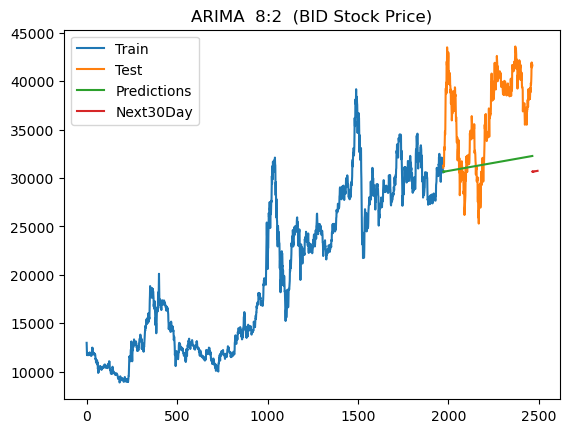

In [61]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error

# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# Calculate MSLE
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)
# 9.Vẽ hình
plt.title( 'ARIMA  8:2  (BID Stock Price)')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [34]:
test_data.index

RangeIndex(start=1725, stop=2464, step=1)